In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Lab 2 : Web scraping and  API requests

In this lab you will practice scraping data from a website, as well as doing some priliminary analysis on them.

(Deadline:   Thursday ( 11:59 pm


## Part 1: Scraping Data From Wikipedia

We have completed a similar task during lecture. You have to scrap a specific page of Wikipedia and answer some questions regarding the data you have collected. 
You have to get the data about different countries and their respective populations from the following page:
[https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population)

This page contains multiple tables for past and future population of countries. For the first part of this lab do the following:

1. Fetch the data from wikipedia with "requests" library
2. Parse html data with BeautifulSoup library
3. Use BeautifulSoup to extract specific tables
4. Combine the tables and convert the data into a dictionary 
5. Make a pandas dataframe from the dictionary 
6. Answer some questions and do some basic visualization!



### 1.1 Get the data from wikipedia (5 pts)

Use "requests" library. 

In [2]:
# Your code here 
import requests
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population').text

### 1.2 Parse html data with BeautifulSoup

Parse the data using BeautifulSoup. Remember that BeautifulSoup has many useful attributes such as prettify(), find(attribute), and find_all(attribute). Check the documentation for more info: [https://www.crummy.com/software/BeautifulSoup/bs4/doc/](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)



#### 1.2.a Find the first title object and extract and print the string stored in it (5 pts)

In [3]:
# Your code here  
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
title = soup.find('title').text.strip()
print(title)

List of countries by past and future population - Wikipedia


#### 1.2.b Find all the paragrpahs, store them in a list, and print the first 10 (5 pts) 

In [4]:
# Your code here  
paragraph = []
p_tags = soup.find_all('p')
for each in p_tags: 
     paragraph.append(str(each.get_text()))
print(paragraph[0:10])

['All the figures shown here have been sourced from the International Data Base (IDB) Division of the United States Census Bureau. Every individual value has been rounded to the nearest thousand, to assure data coherence, particularly when adding up (sub)totals. Although data from specific statistical offices may be more accurate, the information provided here has the advantage of being homogeneous.\n', 'Population estimates, as long as they are based on recent censuses, can be more easily projected into the near future than many macroeconomic indicators, such as GDP, which are much more sensitive to political and/or economic crises. This means that demographic estimates for the next five (or even ten) years can be more accurate than the projected evolution of GDP over the same time period (which may also be distorted by inflation).\n', 'However, no projected population figures can be considered exact. As the IDB states, "figures beyond the years 2020-2025 should be taken with caution"

### 1.3 Extract the tables (10 pts)

We only care about the tables that contain historical population data. Extract all of them.

In [5]:
# Your code here  
# You need to  find all objects that include the css class “wikitable” within the soup object.
tables = soup.find_all('table',{'class':'wikitable'})

In [6]:
# check the tables you extracted

from IPython.core.display import display, HTML
display(HTML(tables[0].prettify()))

Country (or dependent territory),1950,1955,%,1960,%,1965,%,1970,%,1975,%,1980,%
Afghanistan,"8,151","8,892",1.76,"9,830",2.03,"10,998",2.27,"12,431",2.48,"14,133",2.60,"15,045",1.26
Albania,"1,228","1,393",2.56,"1,624",3.12,"1,884",3.02,"2,157",2.74,"2,402",2.17,"2,672",2.16
Algeria,"8,893","9,842",2.05,"10,910",2.08,"11,964",1.86,"13,932",3.09,"16,141",2.99,"18,807",3.10
American Samoa,20,20,0.72,21,0.20,25,4.23,28,2.08,30,1.68,33,1.81
Andorra,7,7,0.04,9,6.28,14,10.17,20,7.49,27,6.32,34,4.81
Angola,"4,118","4,424",1.44,"4,798",1.64,"5,135",1.37,"5,606",1.77,"6,051",1.54,"7,206",3.56
Anguilla,6,6,0.80,6,0.79,6,0.75,7,0.80,7,0.68,7,0.64
"<img alt="""" class=""thumbborder"" data-file-height=""460"" data-file-width=""690"" decoding=""async"" height=""15"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/23px-Flag_of_Antigua_and_Barbuda.svg.png"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/35px-Flag_of_Antigua_and_Barbuda.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/45px-Flag_of_Antigua_and_Barbuda.svg.png 2x"" width=""23""/> Antigua and Barbuda",46,52,2.19,55,1.32,60,1.70,66,2.05,69,0.73,69,0.15
Argentina,"17,151","18,928",1.99,"20,617",1.72,"22,284",1.57,"23,963",1.46,"26,082",1.71,"28,370",1.70
Armenia,"1,356","1,566",2.92,"1,869",3.61,"2,206",3.37,"2,520",2.70,"2,835",2.38,"3,134",2.03


### 1.4 Convert the tables into a dictionary  (35 pts)

Looking at the tables, we only care about the population number throughout the history. You want to associate each country with a series of population values to make a proper time series table you can use to analyze the population in a given coutnry.

First, you need to clean the tables cells from any footnote, links, commas or any garbage values. 
Once your data is cleaned, make a dictionary and combine each country with its corresponding year/population values across all three tables. An entry in your final dictionary should look like this: 


'Albania': {'1950': 1228,
            '1955': 1393,
            '1960': 1624,
            '1965': 1884,
            '1970': 2157,
            '1975': 2402,
            '1980': 2672,
            '1985': 2957,
            '1990': 3245,
            '1995': 3159,
            '2000': 3159,
            '2005': 3025,
            '2010': 2987,
            '2015': 3030,
            '2020': 3075,
            '2025': 3105,
            '2030': 3103,
            '2035': 3063,
            '2040': 2994,
            '2045': 2913,
            '2050': 2825},

One way to do it is:

1. First extract the header 
2. From your header only store values that are numeric (you can use isnumeric() function, recall that we only care about year values and we don't want to store columns represented by %
3. Once you have all the relevant column names (column that correspond to a year value), you can go over every row of the table 
    * Create a dictionary key with the country name 
    * Collect and add values corresponding to one of your column names to the dictionary

In [8]:
country = []

In [9]:
for row in soup.find('table', class_='wikitable').find_all('tr')[1::1]:
    country.append(row.find_all('a')[0].text)
len(country)

228

In [10]:
x = []
for table in tables:
    table_body = table.find('tbody')
    try:
        rows = table_body.find_all('tr')
        for tr in rows:
            cols = tr.find_all('td')
            for td in cols:
                x.append(td.text)
    except:
        print("no tbody")   

In [11]:
x = [x[i].replace("\xa0", "") for i in range(len(x))]
x = [x[i].replace(",", "") for i in range(len(x))]
output = [ a for a in x if a.isnumeric() ]
x = [output[i:i + 7] for i in range(0, len(output), 7)]

In [12]:
x1 =  [ x[i] for i in range(int(len(x)/3))]
x2 =  [ x[228+i] for i in range(int(len(x)/3))]
x3 =  [ x[(228*2)+i] for i in range(int(len(x)/3))]


In [13]:
import pandas as pd
df1 = pd.DataFrame(x1)
df1.columns = ['1950', '1955', '1960', '1965', '1970', '1975', '1980']
df2 = pd.DataFrame(x2)
df2.columns = ['1985', '1990', '1995', '2000', '2005', '2010', '2015']
df3 = pd.DataFrame(x3)
df3.columns = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']

In [14]:
df = pd.concat([df1,df2, df3], axis=1)
df['Country'] = country
cols = list(df.columns)
cols = [cols[-1]] +cols[:-1]
df = df[cols]

In [15]:
dict_pop = df.set_index('Country').T.to_dict()
dict_pop['Albania']

{'1950': '1228',
 '1955': '1393',
 '1960': '1624',
 '1965': '1884',
 '1970': '2157',
 '1975': '2402',
 '1980': '2672',
 '1985': '2957',
 '1990': '3245',
 '1995': '3159',
 '2000': '3159',
 '2005': '3025',
 '2010': '2987',
 '2015': '3030',
 '2020': '3075',
 '2025': '3105',
 '2030': '3103',
 '2035': '3063',
 '2040': '2994',
 '2045': '2913',
 '2050': '2825'}

###  1.5 Create a dataframe from your dictionary (10 pts)

Now that all tables are stored in a dictionary, we can convert the dictionary into a pandas dataframe.

1. Remove the "World" row 
2. Replace 'NaN' values with 0
3. Display the first 8 rows


In [59]:
# Your code here 
import pandas as pd
df = pd.DataFrame(dict_pop)

In [60]:
# Your code here
df1 = df.drop(['World'], axis=1)
df1.apply(pd.to_numeric)
df2 = df1.fillna(0)

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
1950,8151,1228,8893,20,7,4118,6,46,17151,1356,...,2195,6293,53,5010,25349,7,10,4778,2554,2854
1955,8892,1393,9842,20,7,4424,6,52,18928,1566,...,2354,7233,59,6171,27739,8,16,5266,2870,3410
1960,9830,1624,10910,21,9,4798,6,55,20617,1869,...,2531,8532,67,7557,31657,8,28,5872,3255,4011
1965,10998,1884,11964,25,14,5135,6,60,22284,2206,...,2694,10206,75,9068,37259,9,50,6511,3695,4686
1970,12431,2157,13932,28,20,5606,7,66,23963,2520,...,2824,11941,86,10759,42577,9,90,7099,4241,5515
1975,14133,2402,16141,30,27,6051,7,69,26082,2835,...,2844,13988,100,12675,48076,9,73,7935,4849,6342
1980,15045,2672,18807,33,34,7206,7,69,28370,3134,...,2931,15994,117,14768,53716,11,125,9133,5541,7170
1985,13120,2957,22009,39,45,8390,7,65,30672,3465,...,3019,18216,135,16998,60094,14,180,10540,6536,8561
1990,13569,3245,25191,48,53,9486,9,65,33036,3530,...,3086,20531,154,19326,67259,14,218,12417,7604,10157
1995,19446,3159,28322,54,64,11000,10,69,35274,3131,...,3151,23068,173,21550,73784,15,264,14832,8691,11160


In [61]:
df2.head(8)

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
1950,8151,1228,8893,20,7,4118,6,46,17151,1356,...,2195,6293,53,5010,25349,7,10,4778,2554,2854
1955,8892,1393,9842,20,7,4424,6,52,18928,1566,...,2354,7233,59,6171,27739,8,16,5266,2870,3410
1960,9830,1624,10910,21,9,4798,6,55,20617,1869,...,2531,8532,67,7557,31657,8,28,5872,3255,4011
1965,10998,1884,11964,25,14,5135,6,60,22284,2206,...,2694,10206,75,9068,37259,9,50,6511,3695,4686
1970,12431,2157,13932,28,20,5606,7,66,23963,2520,...,2824,11941,86,10759,42577,9,90,7099,4241,5515
1975,14133,2402,16141,30,27,6051,7,69,26082,2835,...,2844,13988,100,12675,48076,9,73,7935,4849,6342
1980,15045,2672,18807,33,34,7206,7,69,28370,3134,...,2931,15994,117,14768,53716,11,125,9133,5541,7170
1985,13120,2957,22009,39,45,8390,7,65,30672,3465,...,3019,18216,135,16998,60094,14,180,10540,6536,8561


##### Part 2. Exploring the data 

Now let's look at the data at hand. 

### 2.1 Plotting population  (15 pts)

Pick 6 countries of your choice and plot their population growth.

<Figure size 1080x1080 with 0 Axes>

Text(0.5, 1.0, 'Population Growth in Malta')

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Population in thousands')

Text(0.5, 1.0, 'Population Growth in India')

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Population in thousands')

Text(0.5, 1.0, 'Population Growth in Bhutan')

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Population in thousands')

Text(0.5, 1.0, 'Population Growth in Greenland')

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Population in thousands')

Text(0.5, 1.0, 'Population Growth in United States')

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Population in thousands')

Text(0.5, 1.0, 'Population Growth in Norway')

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Population in thousands')

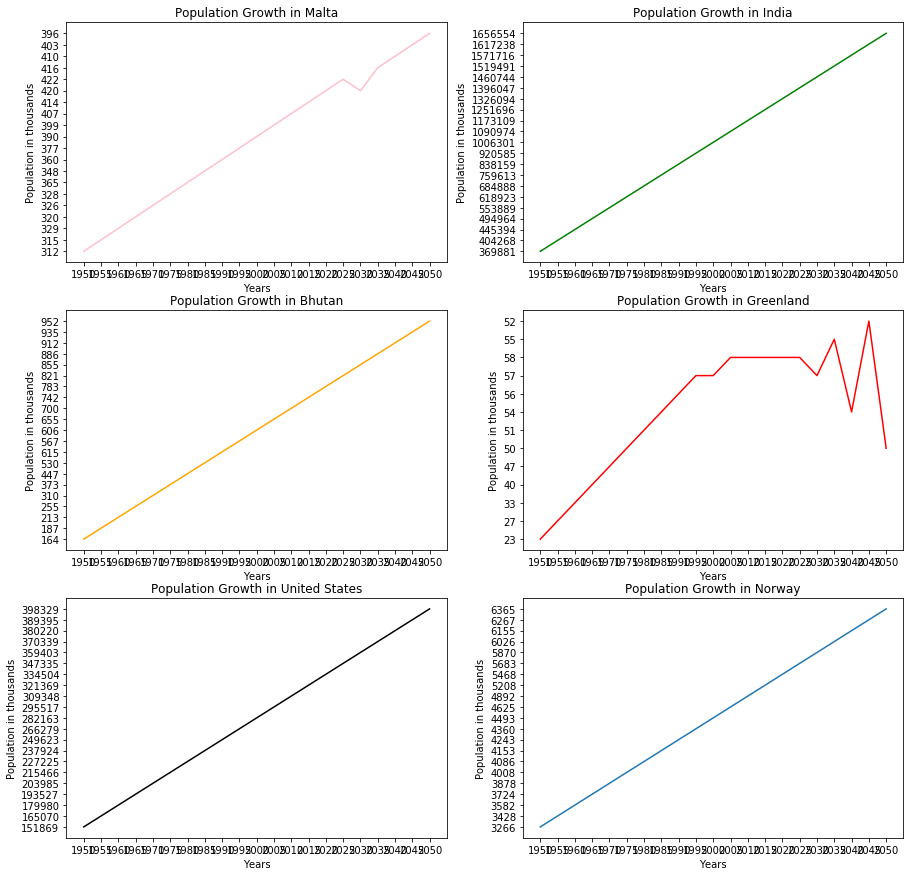

In [73]:
# Your code here
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.plot(df2['Malta'], color='pink')
plt.title('Population Growth in Malta')
plt.xlabel('Years')
plt.ylabel('Population in thousands')
plt.subplot(3,2,2)
plt.plot(df2['India'], color='green')
plt.title('Population Growth in India')
plt.xlabel('Years')
plt.ylabel('Population in thousands')
plt.subplot(3,2,3)
plt.plot(df2['Bhutan'], color='orange')
plt.title('Population Growth in Bhutan')
plt.xlabel('Years')
plt.ylabel('Population in thousands')
plt.subplot(3,2,4)
plt.plot(df2['Greenland'], color='red')
plt.title('Population Growth in Greenland')
plt.xlabel('Years')
plt.ylabel('Population in thousands')
plt.subplot(3,2,5)
plt.plot(df2['United States'], color='black')
plt.title('Population Growth in United States')
plt.xlabel('Years')
plt.ylabel('Population in thousands')
plt.subplot(3,2,6)
plt.plot(df2['Norway'])
plt.title('Population Growth in Norway')
plt.xlabel('Years')
plt.ylabel('Population in thousands')
plt.show()

### 2.2 Find 10 most populous countries ( 15 pts)

Find 10 most popoulous coutntries in 1960, 1980, 2000, 2020, and 2040. 
Plot and compare their population. 

In [122]:
# Your code here
df2 = df2.transpose()

In [134]:
y1960 = pd.to_numeric(df2['1960'])
topy1960 = y1960.nlargest(10)
topy1960


China             651340
India             445394
United States     179980
Russia            119632
Indonesia         100146
Japan              94092
Germany            72481
Brazil             71412
Bangladesh         54593
United Kingdom     52373
Name: 1960, dtype: int64

In [136]:
y1980 = pd.to_numeric(df2['1980'])
topy1980 = y1980.nlargest(10)
topy1980
y2000 = pd.to_numeric(df2['2000'])
topy2000= y2000.nlargest(10)
topy2000
y2020 = pd.to_numeric(df2['2020'])
topy2020= y2020.nlargest(10)
topy2020
y2040 = pd.to_numeric(df2['2040'])
topy2040 = y2040.nlargest(10)
topy2040

China            987822
India            684888
United States    227225
Indonesia        150322
Russia           139039
Brazil           121064
Japan            116808
Bangladesh        87938
Pakistan          85220
Germany           78298
Name: 1980, dtype: int64

China            1268302
India            1006301
United States     282163
Indonesia         214091
Brazil            174316
Pakistan          152430
Russia            147054
Bangladesh        132151
Japan             126776
Nigeria           123946
Name: 2000, dtype: int64

China            1397026
India            1326094
United States     334504
Indonesia         279080
Brazil            216016
Pakistan          213720
Nigeria           204950
Bangladesh        169778
Russia            145723
Mexico            128650
Name: 2020, dtype: int64

India            1571716
China            1428383
United States     380220
Nigeria           322187
Indonesia         314085
Pakistan          269152
Brazil            236077
Bangladesh        196224
Ethiopia          187611
Mexico            147495
Name: 2040, dtype: int64

<Figure size 1080x1080 with 0 Axes>

Text(0.5, 1.0, '10 populous countries in 1960')

Text(0, 0.5, 'Population in thousands')

Text(0.5, 0, 'Countries')

Text(0.5, 1.0, '10 populous countries in 1980')

Text(0, 0.5, 'Population in thousands')

Text(0.5, 0, 'Countries')

Text(0.5, 1.0, '10 populous countries in 2000')

Text(0, 0.5, 'Population in thousands')

Text(0.5, 0, 'Countries')

Text(0.5, 1.0, '10 populous countries in 2020')

Text(0, 0.5, 'Population in thousands')

Text(0.5, 0, 'Countries')

Text(0.5, 1.0, '10 populous countries in 2040')

Text(0, 0.5, 'Population in thousands')

Text(0.5, 0, 'Countries')

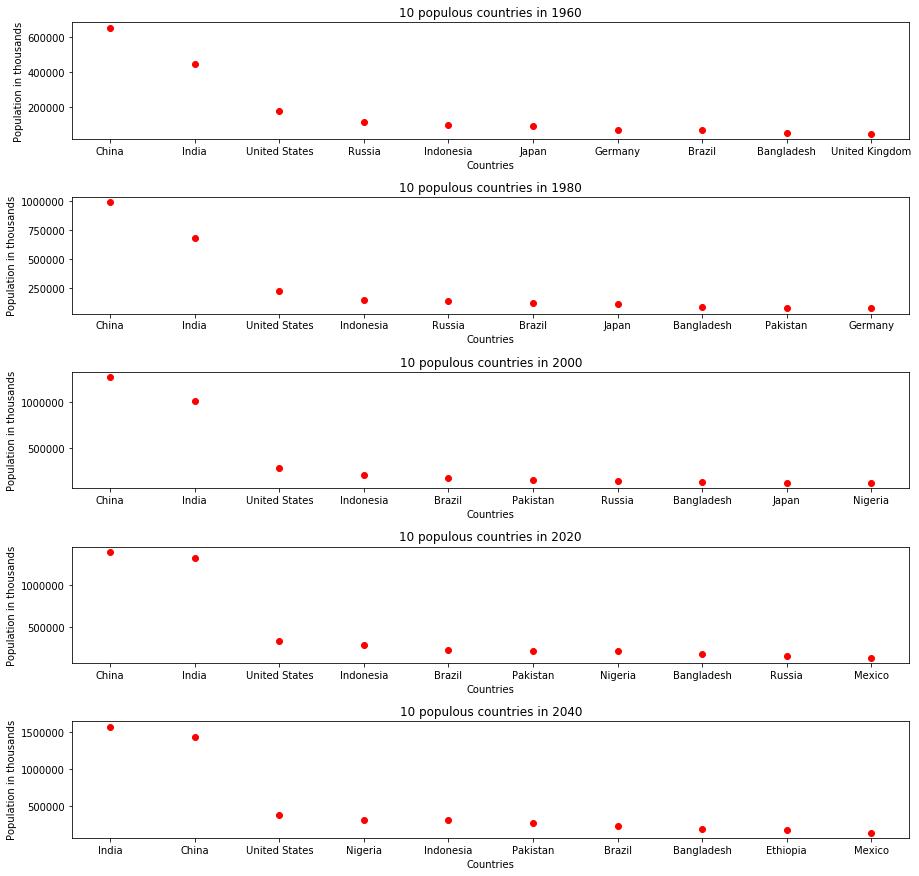

In [157]:
plt.figure(figsize=(15,15))
plt.subplot(5,1,1)
plt.plot(pd.to_numeric(df2['1960']).nlargest(10), marker='o', linewidth=0, color='red')
plt.title('10 populous countries in 1960')
plt.ylabel('Population in thousands')
plt.xlabel('Countries')
plt.subplot(5,1,2)
plt.plot(pd.to_numeric(df2['1980']).nlargest(10), marker='o', linewidth=0, color='red')
plt.title('10 populous countries in 1980')
plt.ylabel('Population in thousands')
plt.xlabel('Countries')
plt.subplot(5,1,3)
plt.plot(pd.to_numeric(df2['2000']).nlargest(10), marker='o', linewidth=0, color='red')
plt.title('10 populous countries in 2000')
plt.ylabel('Population in thousands')
plt.xlabel('Countries')
plt.subplot(5,1,4)
plt.plot(pd.to_numeric(df2['2020']).nlargest(10), marker='o', linewidth=0, color='red')
plt.title('10 populous countries in 2020')
plt.ylabel('Population in thousands')
plt.xlabel('Countries')
plt.subplot(5,1,5)
plt.plot(pd.to_numeric(df2['2040']).nlargest(10), marker='o', linewidth=0, color='red')
plt.title('10 populous countries in 2040')
plt.ylabel('Population in thousands')
plt.xlabel('Countries')
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [159]:
print('India, China and United States have been the top 3 countires with large population and do not seem to change in the coming years')

India, China and United States have been the top 3 countires with large population and do not seem to change in the coming years


In [160]:
print('Of the 10 countries Mexico will be the least populated')

Of the 10 countries Mexico will be the least populated
